In [111]:
# Import basic libraries
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
import csv

import random
from scipy.ndimage import convolve

In [15]:
# Create dataset directories

base_path = 'D:\Intelliza_Projects\TPL\OCR'
aug_images_path = 'D:\\Intelliza_Projects\\TPL\\OCR\\meter_ocr\\samples'

In [79]:
dim = 28
def DigitAugmentation(frame, dim = 28):
    """Randomly alters the image using noise, pixelation and streching image functions"""
    frame = cv2.resize(frame, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    random_num = np.random.randint(0,9)

    if (random_num % 2 == 0):
        frame = add_noise(frame)
    if(random_num % 3 == 0):
        frame = pixelate(frame)
    if(random_num % 2 == 0):
        frame = stretch(frame)
    frame = cv2.resize(frame, (dim, dim), interpolation = cv2.INTER_AREA)
    frame = cv2.bitwise_not(frame)

    return frame 

def add_noise(image):
    """Addings noise to image"""
    prob = random.uniform(0.01, 0.05)
    rnd = np.random.rand(image.shape[0], image.shape[1])
    noisy = image.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy

def pixelate(image):
    "Pixelates an image by reducing the resolution then upscaling it"
    dim = np.random.randint(8,12)
    image = cv2.resize(image, (dim, dim), interpolation = cv2.INTER_AREA)
    image = cv2.resize(image, (16, 16), interpolation = cv2.INTER_AREA)
    return image

def stretch(image):
    "Randomly applies different degrees of stretch to image"
    ran = np.random.randint(0,3)*2
    if np.random.randint(0,2) == 0:
        frame = cv2.resize(image, (dim, ran+dim), interpolation = cv2.INTER_AREA)
        return frame[int(ran/2):int(ran+dim)-int(ran/2), 0:dim]
    else:
        frame = cv2.resize(image, (ran+dim, dim), interpolation = cv2.INTER_AREA)
        return frame[0:dim, int(ran/2):int(ran+32)-int(ran/2)]
    
def pre_process(image, inv = False):
    """Uses OTSU binarization on an image"""
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass
    
    if inv == False:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(th2, (dim,dim), interpolation = cv2.INTER_AREA)
    return resized

In [5]:
# Get the path for sample images
sample_images_path = os.path.join(base_path, 'meter_ocr\\custom_train_images\\')

# Get the full image path in a list
fname = []
for root,d_names,f_names in os.walk(sample_images_path):    
    for f in f_names:
        fname.append(os.path.join(sample_images_path, f))

In [127]:
# Creating 3000 augmented images for each digit - TRAINING DATA
]
for i in range(0, len(fname)):   
    roi = cv2.imread(fname[i], 0)
    x = fname[i].find("-")
    #print(fname[i][x-1])
    #roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    
    print("Augmenting Digit - ", fname[i][x-1])
    
    # Create 3000 versions of each image for our dataset
    for j in range(0, 3000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        
        roi_otsu = cv2.GaussianBlur(roi_otsu, (3, 3), 0)
        
        ##################################################################################
        #To save the augamented image on machine run following code
        
        #folder_path = os.path.join(aug_images_path, str(fname[i][x-1]))
        
        #image_name = re.findall(r'([A-Z0-9]-\d+.JPG)', fname[i])[0]
        #image_name = image_name.split('.')[0]
        
        #image_path =  os.path.join(folder_path, image_name + '_' + str(j) + '.jpg')
        
        #cv2.imwrite(image_path, roi_otsu)
        ##################################################################################
        
        value = np.asarray(roi_otsu, dtype=np.int).reshape(28, 28)
        value = value.flatten()
        
               
        if fname[i][x-1] in (['A','B','C','D']):
            if fname[i][x-1] == 'A':
                value = np.concatenate([[10], value])   
            elif fname[i][x-1] == 'B':
                value = np.concatenate([[11], value])
            elif fname[i][x-1] == 'C':
                value = np.concatenate([[12], value])
            else:
                value = np.concatenate([[13], value])
        else:
            value = np.concatenate([[int(fname[i][x-1])], value])
            
        
        with open('D:\\Intelliza_Projects\\TPL\\OCR\\meter_ocr\\datasets\\customdata.csv', 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(value)


Augmenting Digit -  0
Augmenting Digit -  0
Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  2
Augmenting Digit -  2
Augmenting Digit -  2
Augmenting Digit -  2
Augmenting Digit -  2
Augmenting Digit -  2
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  3
Augmenting Digit -  3
Augmenting Digit -  3
Augmenting Digit -  3
Augmenting Digit -  3
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  5
Augmenting Digit -  5
Augmenting Digit -  5
Augmenting Digit -  5
Augmenting Digit -  5
Augmenting

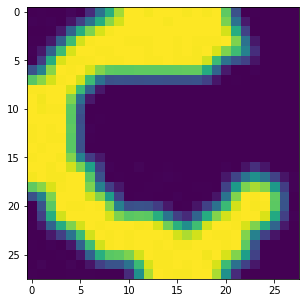

In [94]:
e = cv2.imread('D:/Intelliza_Projects/TPL/OCR/meter_ocr/samples/C/C-1_0.jpg')
g = cv2.cvtColor(e, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(g)

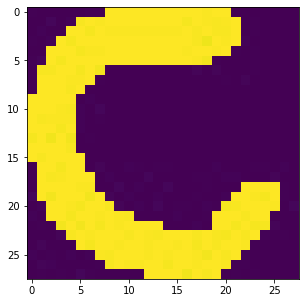

In [83]:
inv = cv2.bitwise_not(g)
plt.figure(figsize=(5,5))
plt.imshow(inv)